In [1]:
import numpy as np
import pylab as pl
from scipy.optimize import curve_fit

In [2]:
def lineare (x, m, q):
    return m*x + q


misure = np.transpose (np.transpose ( np.genfromtxt('foglio_excel_davide.csv',delimiter=',')[1:] )[1:])
print (misure)

[[297.   50.    0.5]
 [299.    4.    0.5]
 [297.   27.    0.5]
 [297.   20.    0.5]
 [296.   30.    0.5]
 [346.   58.    0.5]
 [298.   40.    0.5]]


[47.9        49.13333333 49.51666667 49.63333333] [0.01666667 0.01666667 0.01666667 0.01666667]
[2998.77782491   43.24285481] [36.39041382  0.07091098] -0.9930707245776376 -0.9930707245776373


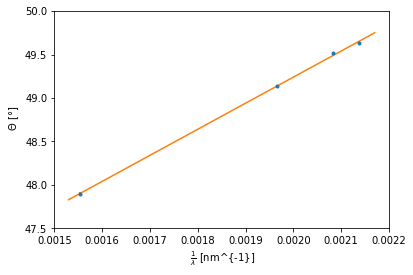

$\chi^{2}$ 4.045277746265609 2


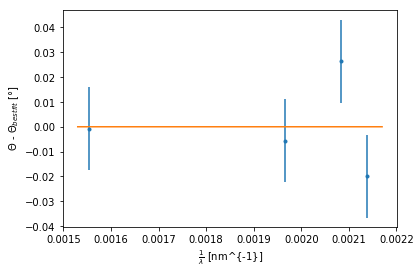

364.96666666666664 0.016666666666666666


In [3]:
primi = np.array([346. , 299., 297., 297., 297., 298. ])    #tolto viola, nn so lunghezza d'onda...
secondi = np.array([58., 4., 50., 27., 20., 39.])


#primi = np.array([346., 299., 297., 297., 297., 296., 298. ])      #messo viola ma peggiora un po'...perchè?
#secondi = np.array([58., 4., 50., 27., 20., 30., 39.])

lunghezze_teo = np.array([ 643.8, 508.6, 480.0, 467.8])     #nm
#lunghezze_teo = np.array([ 643.8, 508.6, 480.0, 467.8, 413.48 ])     #mia supposizione...  



primi = np.array( [primi[0]]*len(primi) ) - primi
secondi = np.array( [secondi[0]]*len(secondi) ) - secondi 

angoli = primi + secondi/60.
#angoli = (np.pi/180.)*angoli    #conversione in radianti 
#angoli = 90. - angoli            #angolo rispetto alla normale?, alla fine ai fini del fit nn cambia niente...

zero = angoli[0]
sodio = angoli[len(angoli) - 1]

angoli = angoli[1:]
angoli = angoli[:-1]
d_angoli = np.array( [1./60.]*len(angoli) )
#d_angoli = d_angoli*np.sqrt(1/2.)  attenzione stima errori e fatto Forti propagazione di errori che riguardano più misure..
#d_angoli[len(angoli) - 2 ] = 2*d_angoli[len(angoli) - 2]
#d_angoli = d_angoli*2.                #Forse più corretto raddoppiare errori (guarda chi quadro) e lunghezza d'onda Na
print (angoli, d_angoli)



popt, pcov = curve_fit (lineare, 1./lunghezze_teo , angoli , sigma = d_angoli , absolute_sigma = 'True' ) #absolute sigma? cambia qualcosa mettere o no i param iniziali, io n  li ho messi.....
print ( popt, np.sqrt( pcov.diagonal() ), pcov[0][1]/np.sqrt(pcov[0][0]*pcov[1][1]), pcov[1][0]/np.sqrt(pcov[0][0]*pcov[1][1]) ) 
pl.errorbar (1./lunghezze_teo, angoli , d_angoli, fmt = '.')
x = np.linspace (0.00153 , 0.00217, 10000)
pl.plot ( x, lineare (x, *popt) )
pl.xlabel(' $ \\frac{1}{\lambda} $ [nm^{-1}] ')
pl.ylabel(" $\Theta $ [°]")
pl.xlim (0.0015, 0.0022 )
pl.ylim ( 47.5, 50. )
pl.savefig("fit_primaparte.eps",format='eps')
pl.show()


#CHIQUADRO
chi2 = ( ( ( angoli - lineare(1./lunghezze_teo, *popt) )/ d_angoli )**2. ).sum()
print ( '$\chi^{2}$' , chi2, len(angoli) - len(popt) )

#RESIDUI NORMALIZZATI
#pl.errorbar( 1./lunghezze_teo, ( angoli - lineare (1./lunghezze_teo, *popt) )/d_angoli , d_angoli/d_angoli , fmt = '.')
pl.errorbar( 1./lunghezze_teo, ( angoli - lineare (1./lunghezze_teo, *popt) ) , d_angoli , fmt = '.')
pl.plot ( x, x-x )
pl.xlabel(' $ \\frac{1}{\lambda} $ [nm^{-1}] ')
pl.ylabel(" $\Theta $ - $\Theta_{bestfit} $ [°]")
pl.savefig("residui_primaparte.eps",format='eps')
#pl.savefig("residuinorm_primaparte.eps",format='eps')
pl.show()

print ( 364. + 58./60., 1./60.)

    
    
    
    




In [4]:
#STIMA LUNGHEZZA D'ONDA DELLA RIGA (DOPPIETTO) GIALLA DEL SODIO
#Valori teorici doppietto Na : D1 589.592 nm     D2 588.995 nm 
lung_Na_teo = (589.592 + 588.995)/2.
lung_Na = ( sodio - popt[1] )/popt[0]
print(sodio)
#print (lung_Na)
a = np.array([lung_Na, 1.])
d_lung_Na = ( (1./popt[0])**2. )* ( np.dot ( a, np.dot( pcov,  np.transpose(a) ) )  + d_angoli[0]**2. )
d_lung_Na = np.sqrt(d_lung_Na)
d_lung_Na = d_lung_Na/(lung_Na)**2.
lung_Na = 1./lung_Na
print ( lung_Na, d_lung_Na, lung_Na_teo )


#ERRORE STIMATO NEL MODO SBAGLIATO
#d_lung_Na = lung_Na*np.sqrt( pcov[0][0]/popt[0]**2.  + ( d_angoli[0]**2. + pcov[1][1] )/( sodio - popt[1] )**2. )
#print (d_lung_Na)


48.31666666666667
591.030552773512 2.4028939642313434 589.2935


Tutto bene, il valore finale è 593.0 \pm 2.4, in leggera sovrastima rispetto al 589.3 teorico; poi discorso della linea viola ecc...RIGUARDARE FOTO PER CONFERMA .....
Modificando il dato del Na da 298 gradi 40 primi a 298 gradi 39 primi il valore diventa : 591.0 \pm 2.4 in buon accordo con il valore teorico...